# Example: 2012 Federal Election Comission DataBase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set()

In [2]:
import os
os.chdir(r'C:\Users\dell\Books\pydata-book-2nd-edition')

In [3]:
df = pd.read_csv('./datasets/fec/P00000001-ALL.csv')
df.info()

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [4]:
df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


A lis of political candidates:

In [5]:
df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

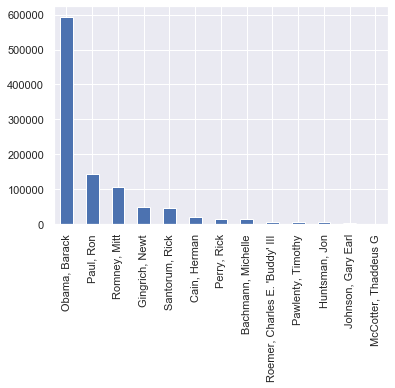

In [6]:
df['cand_nm'].value_counts().plot(kind = 'bar')

In [7]:
%%HTML
From the above figure, we can infer that there are 2 main political candidates:
<ol>
    <li>Obama, Barack</li>
    <li>Paul, Ron</li>
</ol>

Indicating party affiliation:

In [8]:
#Democrat party: Obama, Barack 
#Republican: the others
df['party'] = df['cand_nm'].apply(lambda name: 'Democrat' if name == 'Obama, Barack' else 'Republican')

Democrat      593746
Republican    407985
Name: party, dtype: int64

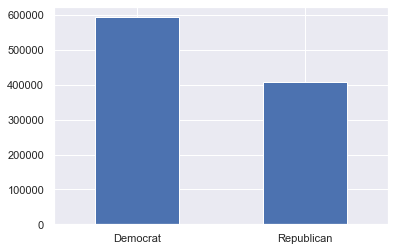

In [9]:
dist = df['party'].value_counts()
dist.plot(kind = 'bar', rot = 0)
dist

To simplify the analysis, we will on the part of data that involves 2 main political candidates: $\mathit{Obama, Barack}$ and
    $\mathit{Paul, Ron}$.

This data includes both contributions and refunds(negative contribution amount)

In [10]:
df['contb_receipt_amt'].describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

In [11]:
prop = (df['contb_receipt_amt'] > 0).value_counts()
prop /= prop.sum()
prop

True     0.989762
False    0.010238
Name: contb_receipt_amt, dtype: float64

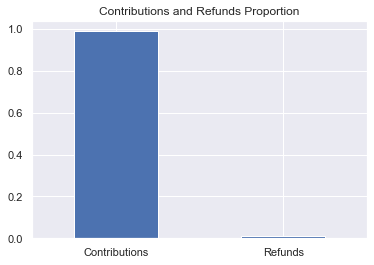

In [12]:
prop.plot(kind = 'bar', title = 'Contributions and Refunds Proportion', rot = 0)
plt.xticks((0, 1), ('Contributions', 'Refunds'))
prop.plot?

To simplify the analysis, restrict data to positive contributions:

In [13]:
df = df[df['contb_receipt_amt'] > 0]


The total number of donations by occupation:

In [14]:

df['contbr_occupation'].value_counts()

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [15]:
%%HTML
Mapping some occupations to its coressponding value:
<ul>
<li>C.E.O. and CEO is the same.</li>
<li>INFORMATION REQUESTED, INFORMATION REQUESTED PER BEST EFFORTs => NOT PROVIDED.</li>
</ul>
        

In [16]:
mapping = {
    'C.E.O.' : 'CEO',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED'
}
df['contbr_occupation'] = df['contbr_occupation'].apply(lambda v: mapping.get(v,v ))


Pivot table by occupation and party, filter out the subset(occupation) that donated at least $2 million overall:

In [17]:
pivot = df.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'party', aggfunc='sum')
occupation_contributions = pivot.sum(1)
pivot = pivot[occupation_contributions > 2000000]
pivot

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


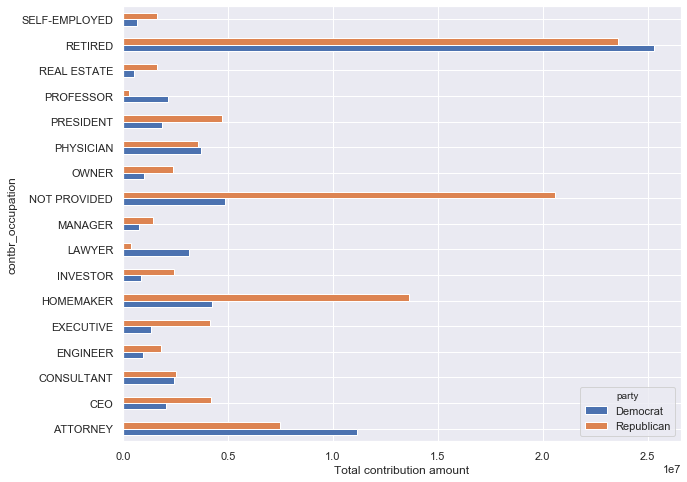

In [18]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
ax.set_xlabel('Total contribution amount')
ax.set_ylabel('Contribution ccupation')
pivot.plot(kind = 'barh', ax = ax)

In [19]:
%%HTML
<b>Inference:</b>
<ul>
    <li>Lawyers tend to donate more money to <em>Democrat</em>.</li>
    <li>CEOs tend to donate more money to <em>Republican</em>.</li>
</ul>

Conduct the analysis on 2 main candidates

In [22]:
df = df[df['cand_nm'].isin(['Obama, Barack', 'Paul, Ron'])]

Top 5 occupation contributions for each political candidates:

In [26]:
group = df.groupby('cand_nm').apply(lambda sub_df: sub_df.groupby('contbr_occupation')['contb_receipt_amt'].sum().nlargest(5))
group

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
Paul, Ron      RETIRED               2526350.60
               ENGINEER               871465.72
               PHYSICIAN              684659.16
               REQUESTED              568532.46
               HOMEMAKER              467082.48
Name: contb_receipt_amt, dtype: float64

In [27]:
%%HTML
<h2>Bucketing Donation Amounts</h2>

In [33]:
bins = [0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
cut = pd.cut(df['contb_receipt_amt'], bins)
buckets = df.groupby(['cand_nm', cut]).size().unstack(level = 0)
buckets

cand_nm,"Obama, Barack","Paul, Ron"
contb_receipt_amt,,
"(0, 1]",493.0,23.0
"(1, 10]",40070.0,2390.0
"(10, 100]",372280.0,99957.0
"(100, 1000]",153991.0,39333.0
"(1000, 10000]",22284.0,1456.0
"(10000, 100000]",2.0,2.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


This data shows that Obama has received a sinificantly larger number of small donations than Paul.

Normalize each bucket:

In [44]:
margin = buckets.sum(axis = 1)
buckets = buckets.div(margin, axis = 0)
buckets

cand_nm,"Obama, Barack","Paul, Ron"
contb_receipt_amt,,
"(0, 1]",0.955426,0.044574
"(1, 10]",0.943712,0.056288
"(10, 100]",0.788333,0.211667
"(100, 1000]",0.796544,0.203456
"(1000, 10000]",0.938669,0.061331
"(10000, 100000]",0.500000,0.500000
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


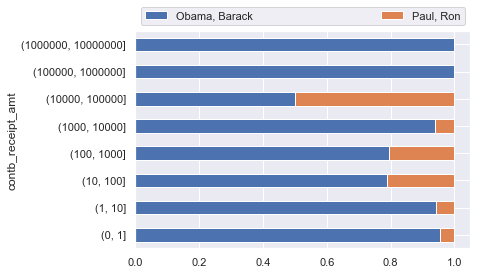

In [50]:
buckets.plot(kind = 'barh', stacked = True)
plt.legend(bbox_to_anchor = (0, 1, 1,1), mode = 'expand', ncol = 2, loc = 'lower left')

In [51]:
%%HTML
<h2>Donation Statistics by states</h2>

Total contribution amounts from each state for 2 political candidates:

In [53]:
data = df.pivot_table('contb_receipt_amt', index = 'contbr_st', columns = 'cand_nm', aggfunc = 'sum')
data

cand_nm,"Obama, Barack","Paul, Ron"
contbr_st,,
AA,56405.00,851.20
AB,2048.00,NaN
AE,42973.75,54254.83
AK,281840.15,128874.09
AL,543123.48,220539.24
AP,37130.50,33784.98
AR,359247.28,116612.21
AS,2955.00,NaN
AZ,1506476.98,546020.56


Get 10 states that donate the largest amount of money in total:

In [54]:
states = data.sum(axis = 1).nlargest(10)
states

contbr_st
CA    26650996.42
IL    17079166.17
NY    15661862.07
TX     9121477.40
FL     8627484.54
MA     7010496.82
MD     5214239.63
WA     4932261.82
VA     4894284.97
PA     4448367.60
dtype: float64

Normalize the amount of contributions from each state to 2 political candidates:

In [56]:
data = data.div(data.sum(1), axis = 0)
data

cand_nm,"Obama, Barack","Paul, Ron"
contbr_st,,
AA,0.985133,0.014867
AB,1.000000,NaN
AE,0.441987,0.558013
AK,0.686220,0.313780
AL,0.711209,0.288791
AP,0.523588,0.476412
AR,0.754944,0.245056
AS,1.000000,NaN
AZ,0.733973,0.266027


Visualize the proportion from each state:

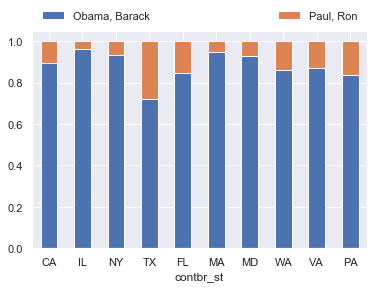

In [62]:
data.loc[states.index].plot(kind = 'bar', stacked = True, rot = 0)
plt.legend(bbox_to_anchor = (0, 1, 1,1), mode = 'expand', ncol = 2, loc = 'lower left', frameon = False)